In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Perceptron():
    # Construtor
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter # numero maximo de iteracoes
        self.W = None # pesos serao calculados no treino
        self.b = None # vies sera calculado no treino
    
    def activation_func(self, net_input): # net_input é calculado a partir da funcao wx + b
        # funcao de ativacao
        return ((2 * (1.0 / (1.0 + np.exp(-net_input)))) -1) # Tanh
    
    def train(self, X_train, y):
        n_ex, n_features = X_train.shape
        # inicializando pesos e vies de forma aleatoria
        self.W = np.random.uniform(size=n_features, low=-0.5, high=0.5)
        self.b = np.random.uniform(low=-0.5, high=0.5)
        
        for _ in range(self.n_iter): # loop com o maximo de iteracoes definido anteriormente
            for x_index, x_features in enumerate(X_train):
                net_input = np.dot(x_features, self.W) + self.b 
                y_predicted = self.activation_func(net_input)
                self._update_weights(x_features, y[x_index], y_predicted)

    def _update_weights(self, x_features, y_actual, y_predicted): # atualizando os pesos a partir do erro calculado
        error = y_actual - y_predicted # erro calculado a partir da predicao de y
        weights_correction = self.learning_rate * error 
        self.W += weights_correction * x_features 
        self.b += weights_correction * error # atualizando o vies
    
    def predict(self, X_train): # predicao de y a partir da formula Activation(wx + b)
        net_input = np.dot(X_train, self.W) + self.b
        y_predicted = self.activation_func(net_input)
        return y_predicted
    
    def get_weights(self):
        return self.W
    
    def get_bias(self):
        return self.b

In [3]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

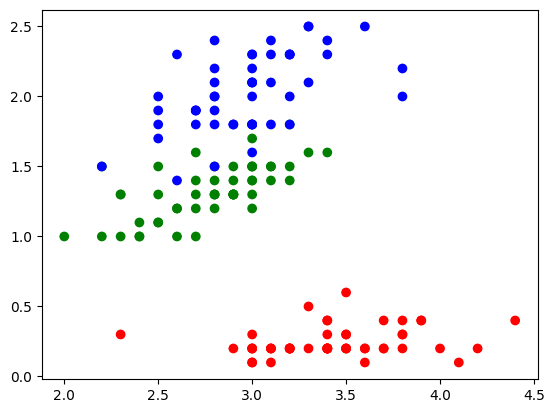

In [5]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'blue', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

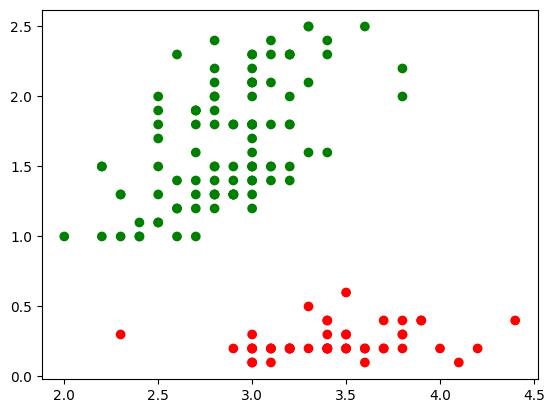

In [6]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'green', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

In [7]:
df = iris_df.drop(['sepal length (cm)', 'petal length (cm)'], axis = 1)
df['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=[1.0, 0.0, 0.0], inplace=True) 
# irei utilizar os valores da subespecie setos vs virginica+versicolor para o teste, entao foi usado o valor 1 para setosa e 0 para os outros
df.head()

,sepal width (cm),petal width (cm),species
0,3.5,0.2,1.0
1,3.0,0.2,1.0
2,3.2,0.2,1.0
3,3.1,0.2,1.0
4,3.6,0.2,1.0


In [8]:
y = df[['species']] # labels
y.head()

,species
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [9]:
X = df[['sepal width (cm)', 'petal width (cm)']] # os inputs utilizados serao a largura da petala e da sepala
X.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [10]:
# utilizando apenas os valores dos inputs e dos labels
X1 = X.values 
y1 = y.values.flatten()

In [16]:
perceptron = Perceptron()
perceptron.train(X1, y1)

predictions = [perceptron.predict(x) for x in X1]

accuracy = np.mean(predictions == y1)*100

print(f'Acurácia: {accuracy:.3f}')

Acurácia: 28.667


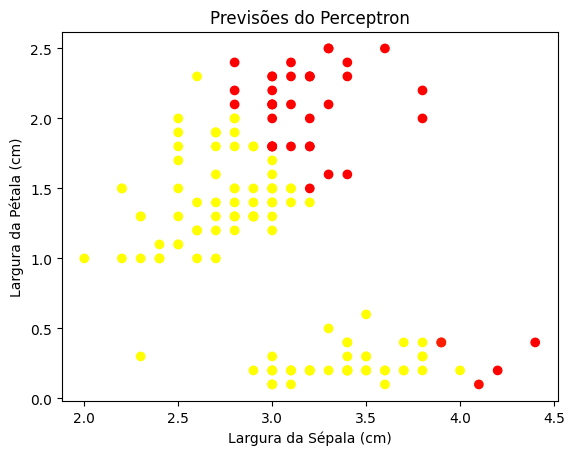

In [17]:
plt.scatter(X1[:, 0], X1[:, 1], c=predictions, cmap='autumn')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.title('Previsões do Perceptron')
plt.show()

In [18]:
pesos = perceptron.get_weights()
vies = perceptron.get_bias()

In [19]:
A = - pesos[0]/pesos[1]
B = - vies/pesos[1]

print('pesos: ', pesos)
print('vies: ', vies)
print('linha classificadora: x2 = %s*x1 %s' % (A, B))

pesos:  [-249.48580716 -162.88539129]
vies:  1036.1011993611492
linha classificadora: x2 = -1.5316647194692643*x1 6.360921572834522


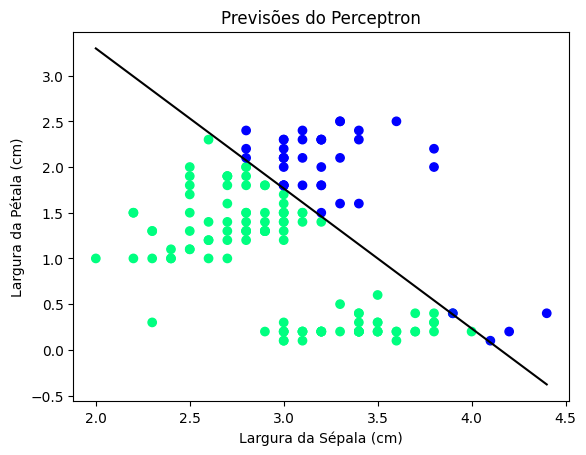

In [20]:
min = np.min(X1[:,0])
max = np.max(X1[:,0])
x1 = [min, max]
x2 = [A*min+B, A*max+B]

# Plot dos valores calculados
plt.scatter(X1[:, 0], X1[:, 1], c=predictions, cmap='winter')
plt.plot(x1, x2, color='black')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.title('Previsões do Perceptron')

plt.show()